<a href="https://colab.research.google.com/github/Sanju094/sleep_disorder-classification/blob/main/Sleep_Finalfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let us try

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


file_path = '/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [ ]:
df.shape


(374, 13)

In [ ]:
df.drop_duplicates()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
df.drop("Person ID",axis=1,inplace=True)

In [ ]:
gender_count = df["Gender"].value_counts().reset_index()

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig = px.pie(gender_count, values='count', names="Gender")
fig.show()

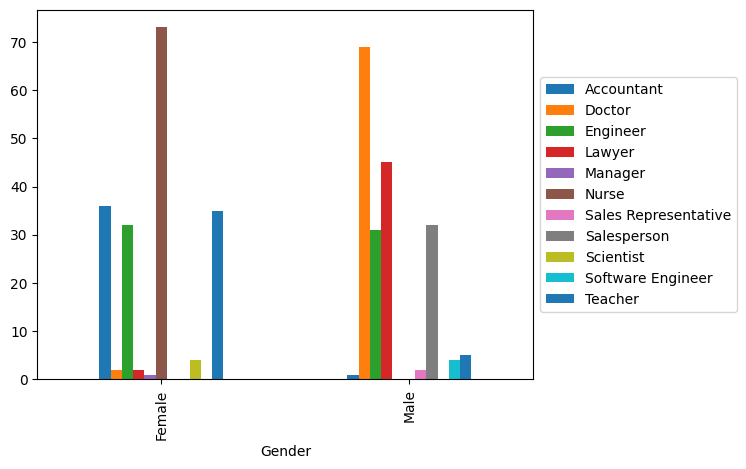

In [ ]:
pd.crosstab(df["Gender"],df["Occupation"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

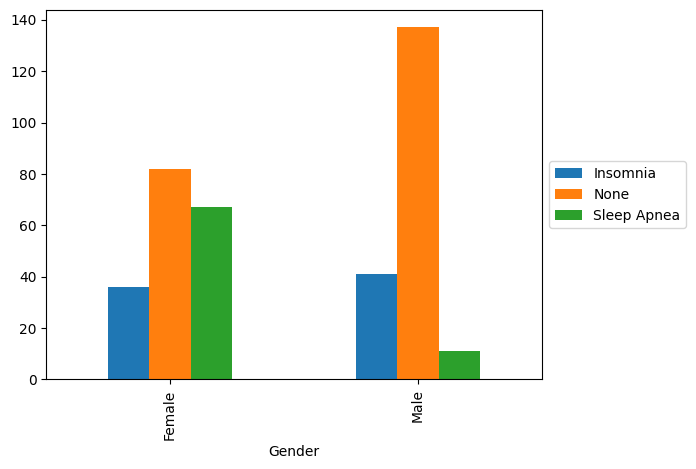

In [ ]:
pd.crosstab(df["Gender"],df["Sleep Disorder"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

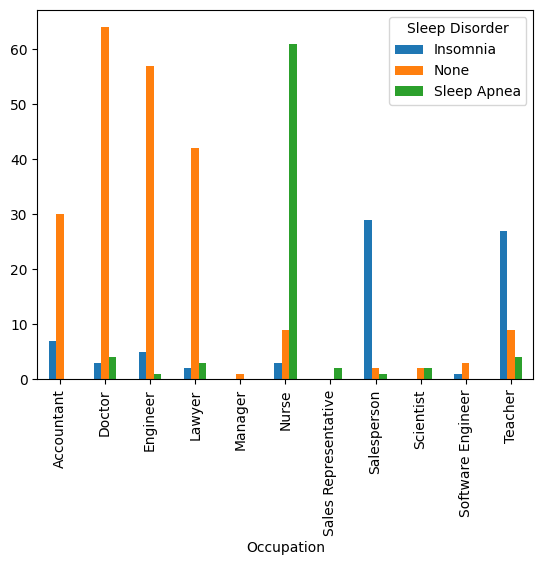

In [ ]:
pd.crosstab(df["Occupation"],df["Sleep Disorder"]).plot(kind="bar")
plt.show()

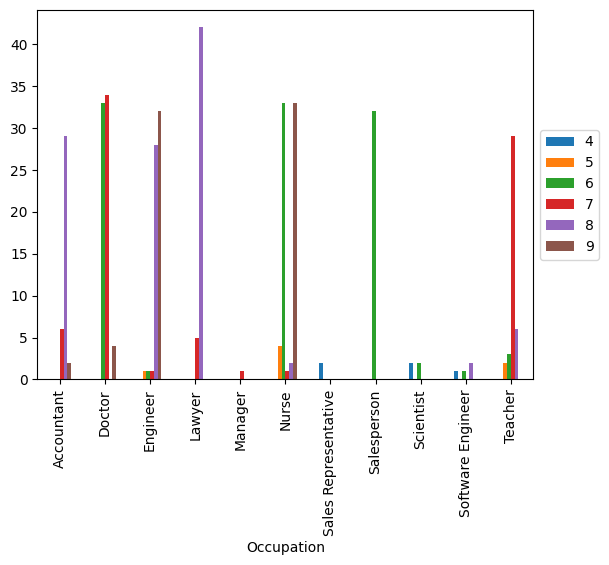

In [ ]:
pd.crosstab(df["Occupation"],df["Quality of Sleep"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

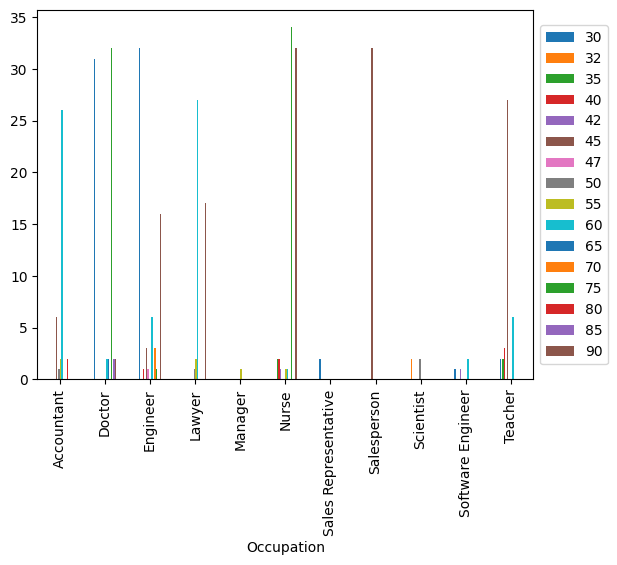

In [ ]:
pd.crosstab(df["Occupation"],df["Physical Activity Level"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

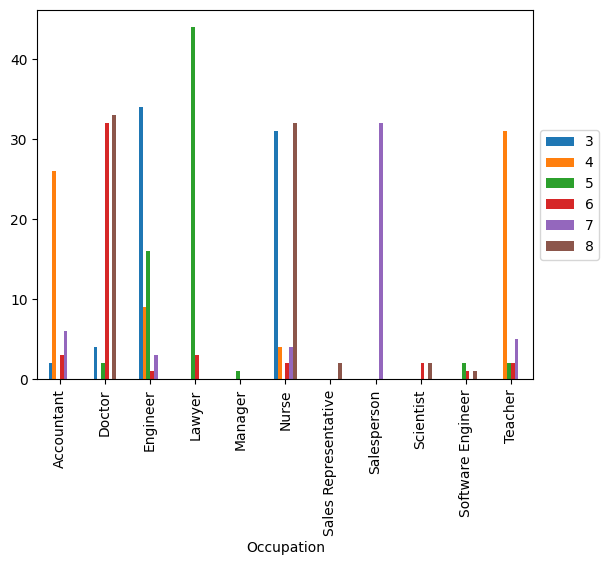

In [ ]:
pd.crosstab(df["Occupation"],df["Stress Level"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
df['BMI Category']=df['BMI Category'].replace({'Normal':'Normal Weight'})

In [ ]:
BMI_Category_count=df['BMI Category'].value_counts().reset_index()
BMI_Category_count

,BMI Category,count
0,Normal Weight,216
1,Overweight,148
2,Obese,10


In [ ]:
fig=px.pie(BMI_Category_count,values='count',names='BMI Category',title="the BMI Category")
fig.show()

In [ ]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure_Upper', 1: 'BloodPressure_Lower'})
df['BloodPressure_Upper'] = df['BloodPressure_Upper'].astype(float)
df['BloodPressure_Lower'] = df['BloodPressure_Lower'].astype(float)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,1,27,9,6.1,6,42,6,2,77,4200,1,126.0,83.0
1,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,1,28,6,5.9,4,30,8,1,85,3000,2,140.0,90.0
4,1,28,6,5.9,4,30,8,1,85,3000,2,140.0,90.0


In [ ]:
import numpy as np


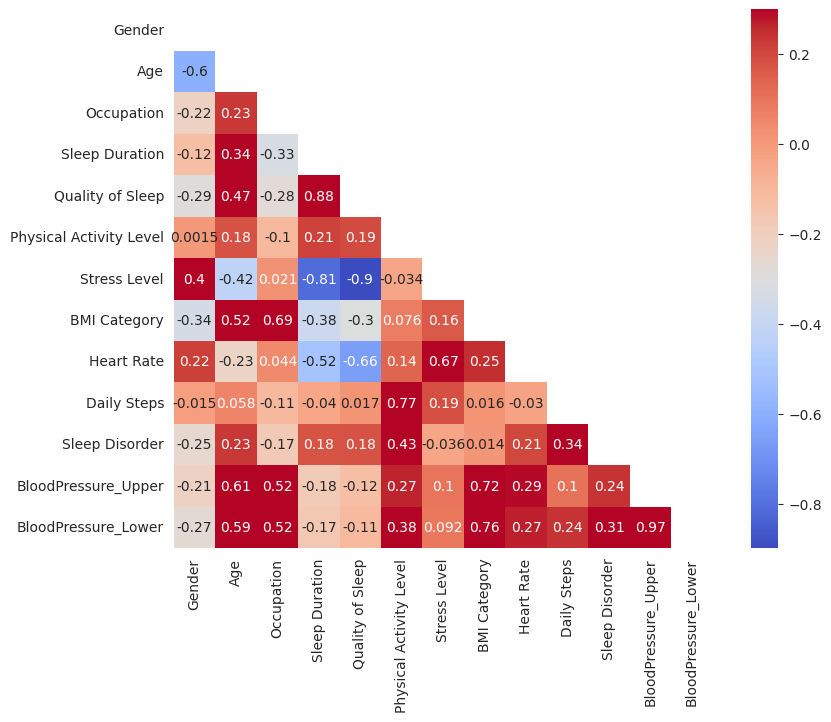

In [ ]:
def corr_vis(corr) :
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 7))
        g = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='coolwarm')
        g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)

num_corr = df.corr()
corr_vis(df.corr())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc

# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score
import plotly.express as px

In [ ]:
# lr_pred_d = lr_d.predict(X_test)

In [ ]:
# # Classification reports for different algorithms
# lr_d_report = classification_report(y_test, lr_pred_d)

# # Plot classification reports
# print("[ Logistic Regression report ]\n")
# print(lr_d_report)

In [ ]:
# lr_d_report = classification_report(y_test, lr_pred_d)

# # Plot classification reports
# print("[ Logistic Regression report ]\n")
# print(lr_d_report)

In [ ]:
# rf_d_report = classification_report(y_test, rf_pred_d)

# # Plot classification reports
# print("[ Random forest report ]\n")
# print(rf_d_report)

In [ ]:

# accuracy = accuracy_score(y_test,xgb_pred_d)
# precision = precision_score(y_test,xgb_pred_d, average='weighted')
# recall = recall_score(y_test, xgb_pred_d, average='weighted')
# f1 = f1_score(y_test, xgb_pred_d, average='weighted')
# xgb_d_report = classification_report(y_test, xgb_pred_d)

# print(accuracy)
# # Plot classification reports
# print("[ XGB report ]\n")
# print(xgb_d_report)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# Define the base model
base_model = SVC(probability=True, random_state=2)

# Create the Random Subspace ensemble using BaggingClassifier
random_subspace_ensemble = BaggingClassifier(
    base_estimator=base_model,
    n_estimators=1500,  # Number of base models
    max_features=0.2,  # Use 70% of the features for each base model
    random_state=2,
    n_jobs=-1  # Use all available cores
)

# Train the Random Subspace ensemble
random_subspace_ensemble.fit(X_train, y_train)

# Predict and evaluate the model
subspace_y_pred = random_subspace_ensemble.predict(X_test)

# Metrics
accuracy_subspace = accuracy_score(y_test, subspace_y_pred)
precision_subspace = precision_score(y_test, subspace_y_pred, average='weighted')
recall_subspace = recall_score(y_test, subspace_y_pred, average='weighted')
f1_subspace = f1_score(y_test, subspace_y_pred, average='weighted')
report_subspace = classification_report(y_test, subspace_y_pred)

# Print the metrics for the Random Subspace ensemble
print("Random Subspace Ensemble Metrics:")
print(f'Accuracy: {accuracy_subspace}')
print(f'Precision: {precision_subspace}')
print(f'Recall: {recall_subspace}')
print(f'F1 Score: {f1_subspace}')
print(f'Classification Report:\n{report_subspace}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Random Subspace Ensemble Metrics:
Accuracy: 0.92
Precision: 0.9224242424242425
Recall: 0.92
F1 Score: 0.9201459188326493
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.91      0.95      0.93        42
           2       1.00      0.89      0.94        18

    accuracy                           0.92        75
   macro avg       0.93      0.90      0.91        75
weighted avg       0.92      0.92      0.92        75





# cv

Cross-Validation Accuracy Scores: [0.93333333 0.88333333 0.91666667 0.88333333 0.89830508]
Mean CV Accuracy: 0.9029943502824859
Standard Deviation of CV Accuracy: 0.019506340067231353
[ Gradient Boosting Report - Test Set ]

[[13  2  0]
 [ 0 42  0]
 [ 1  1 16]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.93      1.00      0.97        42
           2       1.00      0.89      0.94        18

    accuracy                           0.95        75
   macro avg       0.95      0.92      0.93        75
weighted avg       0.95      0.95      0.95        75



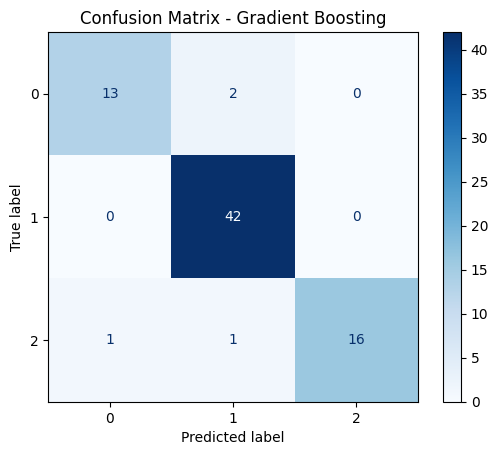

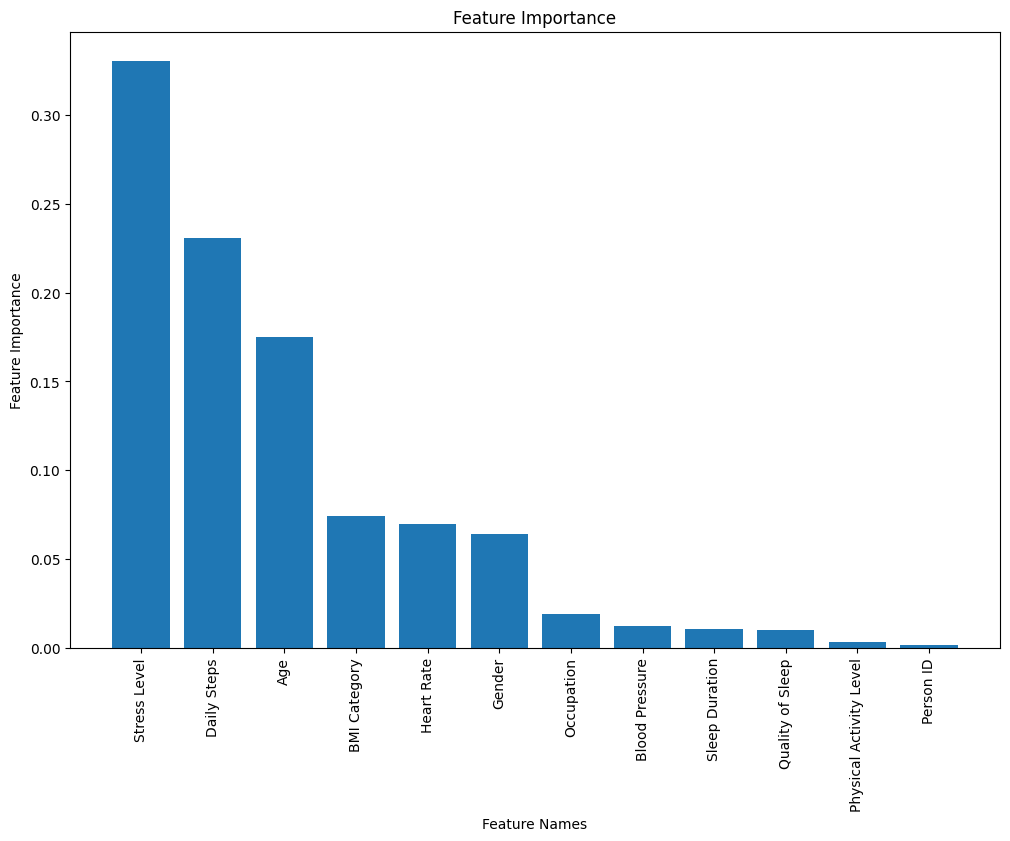

Train Accuracy: 0.9264214046822743
Test Accuracy: 0.9466666666666667
Mean CV Accuracy: 0.9029943502824859


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Gradient Boosting model with adjusted hyperparameters
gb_d = GradientBoostingClassifier(
    n_estimators=200,          # Number of trees
    max_depth=4,               # Depth of each tree
    learning_rate=0.01,         # Learning rate
    min_samples_split=5,       # Minimum samples required to split an internal node
    min_samples_leaf=2,        # Minimum number of samples required at a leaf node
    random_state=2
)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(gb_d, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {mean_cv_accuracy}")
print(f"Standard Deviation of CV Accuracy: {std_cv_accuracy}")

# Train the model on the full training set
gb_d.fit(X_train, y_train)

# Predict on the training set
train_y_pred = gb_d.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)

# Predict on the test set
gb_pred_d = gb_d.predict(X_test)
test_accuracy = accuracy_score(y_test, gb_pred_d)

# Generate and print the classification report and confusion matrix for the test set
gb_d_report = classification_report(y_test, gb_pred_d)
gb_d_reportc = confusion_matrix(y_test, gb_pred_d)

print("[ Gradient Boosting Report - Test Set ]\n")
print(gb_d_reportc)
print(gb_d_report)

# Plot the confusion matrix for the test set
disp = ConfusionMatrixDisplay(confusion_matrix=gb_d_reportc)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

# Plot feature importances
feature_names = [
    'Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
    'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
    'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps'
]

# Get feature importances from the Gradient Boosting model
feature_importances = gb_d.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

# Print accuracy results
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Mean CV Accuracy: {mean_cv_accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Cross-Validation Accuracy: Mean=0.8862146892655367, Std=0.016898606362549324


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Bagging
Train Accuracy: 0.9297658862876255
Test Accuracy: 0.9333333333333333
Cross-Validation Accuracy: Mean=0.8862146892655367, Std=0.016898606362549324
Precision: 0.933414820473644
Recall: 0.9333333333333333
F1 Score: 0.9326924046282508
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.93      0.98      0.95        42
           2       0.94      0.89      0.91        18

    accuracy                           0.93        75
   macro avg       0.93      0.91      0.92        75
weighted avg       0.93      0.93      0.93        75



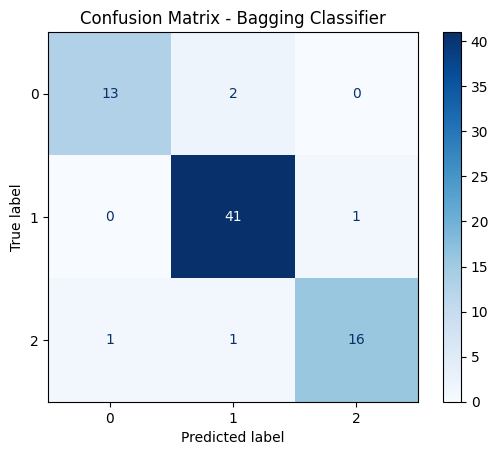

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the base learner for bagging
base_learner = DecisionTreeClassifier(random_state=2)

# Create the bagging classifier
bagging_model = BaggingClassifier(base_estimator=base_learner, n_estimators=50, random_state=2)

# Perform cross-validation
cv_scores = cross_val_score(bagging_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: Mean={cv_scores.mean()}, Std={cv_scores.std()}")

# Train the bagging classifier
bagging_model.fit(X_train, y_train)

# Predict and evaluate the model on the training set
train_y_pred = bagging_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)

# Predict and evaluate the model on the test set
bag_y_pred = bagging_model.predict(X_test)
test_accuracy = accuracy_score(y_test, bag_y_pred)

# Metrics
precision = precision_score(y_test, bag_y_pred, average='weighted')
recall = recall_score(y_test, bag_y_pred, average='weighted')
f1 = f1_score(y_test, bag_y_pred, average='weighted')
report = classification_report(y_test, bag_y_pred)

print("Bagging")
# Print the metrics
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Cross-Validation Accuracy: Mean={cv_scores.mean()}, Std={cv_scores.std()}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{report}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, bag_y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming df is your DataFrame and 'Sleep Disorder' is the target variable

# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the base learners
base_learners = [
    ('lr', LogisticRegression(random_state=2)),
    ('rf', RandomForestClassifier(random_state=2)),
    ('gb', GradientBoostingClassifier(random_state=2)),
    ('adb', AdaBoostClassifier(random_state=2)),
    ('xgb', XGBClassifier(random_state=2)),
]

# Define the meta-learner
meta_learner = LogisticRegression(random_state=2)

# Create the stacking ensemble
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Train the stacking ensemble
stacking_model.fit(X_train, y_train)

# Predict and evaluate the model on the test set
st_y_pred = stacking_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, st_y_pred)
precision = precision_score(y_test, st_y_pred, average='weighted')
recall = recall_score(y_test, st_y_pred, average='weighted')
f1 = f1_score(y_test, st_y_pred, average='weighted')
report = classification_report(y_test, st_y_pred)

# Print the metrics
print('Stacking Classifier Evaluation on Test Set:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{report}')

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Perform cross-validation with multiple metrics
cv_results = cross_validate(stacking_model, X_train, y_train, cv=cv,
                            scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])

# Output the cross-validation results
print('Cross-validation results:')
print('Accuracy:', cv_results['test_accuracy'])
print('Precision:', cv_results['test_precision_weighted'])
print('Recall:', cv_results['test_recall_weighted'])
print('F1 Score:', cv_results['test_f1_weighted'])
print('Mean CV Accuracy:', cv_results['test_accuracy'].mean())
print('Mean CV Precision:', cv_results['test_precision_weighted'].mean())
print('Mean CV Recall:', cv_results['test_recall_weighted'].mean())
print('Mean CV F1 Score:', cv_results['test_f1_weighted'].mean())


Stacking Classifier Evaluation on Test Set:
Accuracy: 0.9333333333333333
Precision: 0.936
Recall: 0.9333333333333333
F1 Score: 0.9322048066875654
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.93      1.00      0.97        42
           2       1.00      0.83      0.91        18

    accuracy                           0.93        75
   macro avg       0.93      0.90      0.91        75
weighted avg       0.94      0.93      0.93        75

Cross-validation results:
Accuracy: [0.85       0.91666667 0.95       0.95       0.89830508]
Precision: [0.85106838 0.92043651 0.9547619  0.95080586 0.89584786]
Recall: [0.85       0.91666667 0.95       0.95       0.89830508]
F1 Score: [0.85       0.9166643  0.95080586 0.94998122 0.89442593]
Mean CV Accuracy: 0.912994350282486
Mean CV Precision: 0.9145841025363772
Mean CV Recall: 0.912994350282486
Mean CV F1 Score: 0.9123754618463188


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming df is your DataFrame and 'Sleep Disorder' is the target variable

# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the base learners
base_learners = [
    ('lr', LogisticRegression(random_state=2)),
    ('rf', RandomForestClassifier(random_state=2)),
    ('gb', GradientBoostingClassifier(random_state=2)),
    ('adb', AdaBoostClassifier(random_state=2)),
    ('xgb', XGBClassifier(random_state=2)),
    # ('ann', MLPClassifier(hidden_layer_sizes=(50, 60), max_iter=200, random_state=2))  # Optional MLPClassifier
]

# Define the meta-learner
meta_learner = LogisticRegression(random_state=2)

# Create the stacking ensemble
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Perform cross-validation with multiple metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
cv_results = cross_validate(stacking_model, X_train, y_train, cv=cv,
                            scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])

# Output the cross-validation results
mean_cv_accuracy = cv_results['test_accuracy'].mean()
mean_cv_precision = cv_results['test_precision_weighted'].mean()
mean_cv_recall = cv_results['test_recall_weighted'].mean()
mean_cv_f1 = cv_results['test_f1_weighted'].mean()

print('Cross-validation results:')
print('Accuracy:', cv_results['test_accuracy'])
print('Precision:', cv_results['test_precision_weighted'])
print('Recall:', cv_results['test_recall_weighted'])
print('F1 Score:', cv_results['test_f1_weighted'])
print(f'Mean CV Accuracy: {mean_cv_accuracy}')
print(f'Mean CV Precision: {mean_cv_precision}')
print(f'Mean CV Recall: {mean_cv_recall}')
print(f'Mean CV F1 Score: {mean_cv_f1}')

# Train the stacking ensemble
stacking_model.fit(X_train, y_train)

# Predict and evaluate the model on the training set
train_y_pred = stacking_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)

# Predict and evaluate the model on the test set
test_y_pred = stacking_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_y_pred)

# Metrics
precision = precision_score(y_test, test_y_pred, average='weighted')
recall = recall_score(y_test, test_y_pred, average='weighted')
f1 = f1_score(y_test, test_y_pred, average='weighted')
report = classification_report(y_test, test_y_pred)

print('Stacking Classifier Evaluation on Test Set:')
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{report}')


Cross-validation results:
Accuracy: [0.85       0.91666667 0.95       0.95       0.89830508]
Precision: [0.85106838 0.92043651 0.9547619  0.95080586 0.89584786]
Recall: [0.85       0.91666667 0.95       0.95       0.89830508]
F1 Score: [0.85       0.9166643  0.95080586 0.94998122 0.89442593]
Mean CV Accuracy: 0.912994350282486
Mean CV Precision: 0.9145841025363772
Mean CV Recall: 0.912994350282486
Mean CV F1 Score: 0.9123754618463188
Stacking Classifier Evaluation on Test Set:
Train Accuracy: 0.9264214046822743
Test Accuracy: 0.9333333333333333
Precision: 0.936
Recall: 0.9333333333333333
F1 Score: 0.9322048066875654
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.93      1.00      0.97        42
           2       1.00      0.83      0.91        18

    accuracy                           0.93        75
   macro avg       0.93      0.90      0.91        75
weighted avg       0.94    

# Genetic algorithm

In [ ]:
!pip install deap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00


gen	nevals
0  	10    
Error evaluating individual: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validati

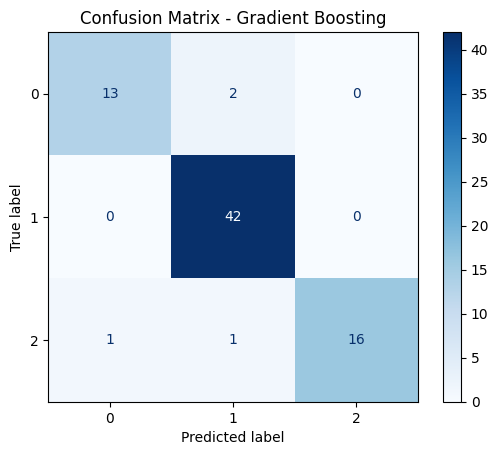

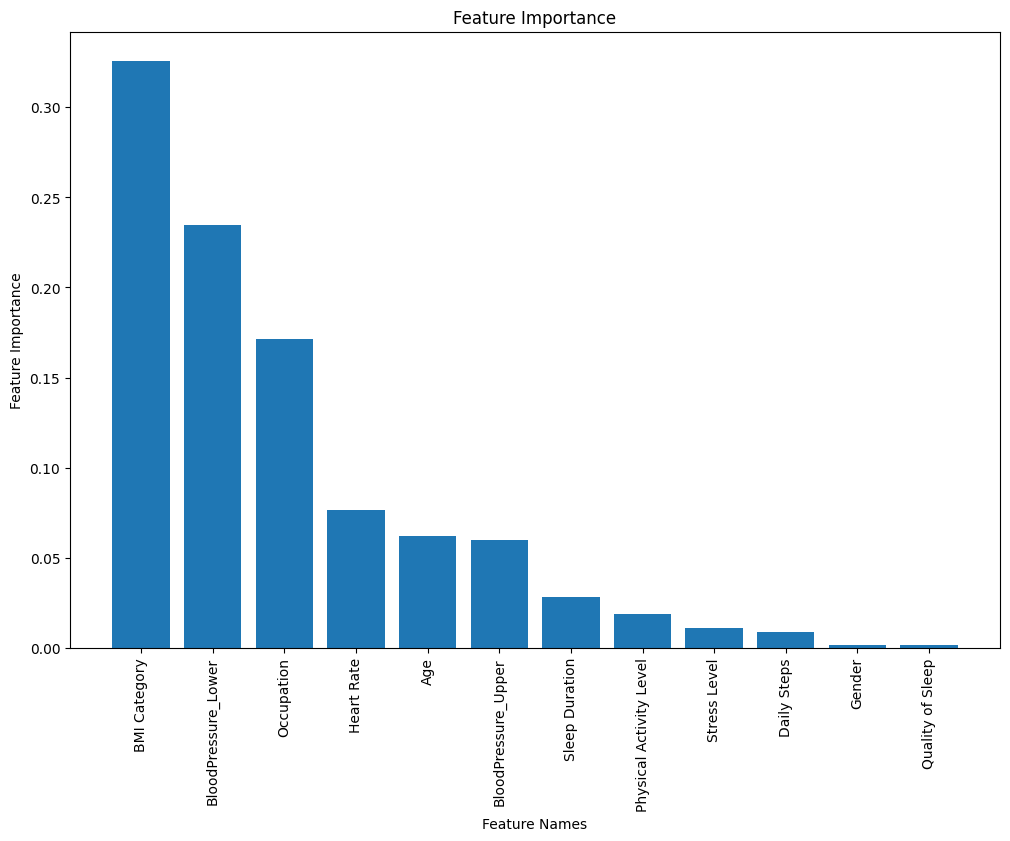

Chi-square test: chi2_stat = 122.85846560846562, p-value = 1.3092155757442185e-25, degrees of freedom = 4


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the fitness function
def evaluate(individual):
    n_estimators, max_depth, learning_rate, min_samples_split, min_samples_leaf = individual
    # Ensure valid parameter values
    max_depth = int(max_depth)
    if max_depth <= 0:
        max_depth = None  # Set to None if invalid

    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)

    model = GradientBoostingClassifier(
        n_estimators=int(n_estimators),
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=2
    )

    # Use cross-validation to evaluate the model
    try:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        return (scores.mean(),)
    except Exception as e:
        print(f"Error evaluating individual: {e}")
        return (0.0,)

# Define the Genetic Algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 50, 201)  # For n_estimators
toolbox.register("attr_depth", np.random.randint, 1, 11)  # For max_depth (1 to 10)
toolbox.register("attr_lr", np.random.uniform, 0.01, 0.2)  # For learning_rate
toolbox.register("attr_split", np.random.randint, 2, 21)  # For min_samples_split
toolbox.register("attr_leaf", np.random.randint, 1, 21)  # For min_samples_leaf

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_int, toolbox.attr_depth, toolbox.attr_lr, toolbox.attr_split, toolbox.attr_leaf),
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population and run the algorithm
population = toolbox.population(n=10)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

# Get the best individual
best_individual = tools.selBest(population, 1)[0]
print(f"Best Individual: {best_individual}")

# Train and evaluate the best model
best_model = GradientBoostingClassifier(
    n_estimators=int(best_individual[0]),
    max_depth=int(best_individual[1]) if best_individual[1] > 0 else None,
    learning_rate=best_individual[2],
    min_samples_split=int(best_individual[3]),
    min_samples_leaf=int(best_individual[4]),
    random_state=2
)
best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)  # Predictions on training data
gra_pred_test = best_model.predict(X_test)    # Predictions on test data

# Print metrics for training and test data
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, gra_pred_test))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train))
print("Test Classification Report:\n", classification_report(y_test, gra_pred_test))

# Confusion Matrix
conf_matrix_test = confusion_matrix(y_test, gra_pred_test)
print("Test Confusion Matrix:\n", conf_matrix_test)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

# Feature Importances
feature_importances = best_model.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Feature names based on the dataset
feature_names = X.columns

# Plot Feature Importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

import random
from scipy.stats import ttest_ind, chi2_contingency

chi2_stat, chi2_p_value, dof, expected = chi2_contingency(conf_matrix_test)
print(f"Chi-square test: chi2_stat = {chi2_stat}, p-value = {chi2_p_value}, degrees of freedom = {dof}")


Population Size (n): 10
Number of Generations (ngen): 10
Crossover Probability (cxpb): 0.5
Mutation Probability (mutpb): 0.2
Genetic Algorithm Operators:
Crossover: cxBlend with alpha=0.5
Mutation: mutGaussian with mu=0, sigma=1, indpb=0.2
Selection: selTournament with tournsize=3

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning:

A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Generation 1/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 2/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 3/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 4/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 5/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 6/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 7/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 8/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 9/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 10/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 11/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 12/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 13/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 14/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 15/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 16/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 17/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 18/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 19/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Generation 20/20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

Best Individual: [34.81397900842449, 5.493002057715557]
Bagging Classifier with GA Optimization
Train Accuracy: 0.9230769230769231
Test Accuracy: 0.92
Precision: 0.920151515151515
Recall: 0.92
F1 Score: 0.9190515275877794
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.93      0.98      0.95        42
           2       0.94      0.83      0.88        18

    accuracy                           0.92        75
   macro avg       0.91      0.89      0.90        75
weighted avg       0.92      0.92      0.92        75



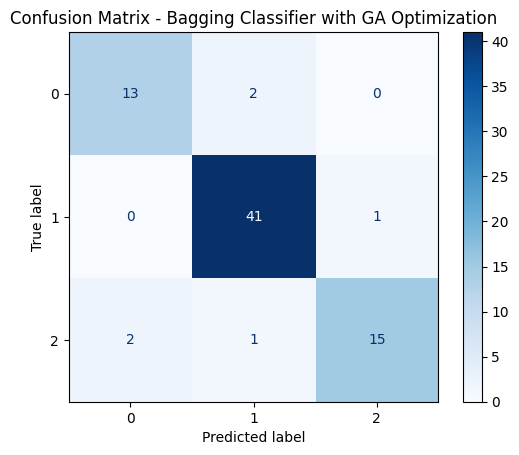

Chi-square test: chi2_stat = 109.92144660894661, p-value = 7.563877151736377e-23, degrees of freedom = 4


In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from deap import base, creator, tools
import random
from scipy.stats import chi2_contingency

# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the fitness function for the genetic algorithm
def evaluate(individual):
    n_estimators, max_depth = individual
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)

    # Ensure hyperparameters are within valid ranges
    if not (10 <= n_estimators <= 200) or not (1 <= max_depth <= 20):
        return 0,  # Invalid hyperparameters

    base_learner = DecisionTreeClassifier(max_depth=max_depth, random_state=2)
    bagging_model = BaggingClassifier(base_estimator=base_learner, n_estimators=n_estimators, random_state=2)

    # Perform cross-validation
    cv_scores = cross_val_score(bagging_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_accuracy = cv_scores.mean()

    return mean_cv_accuracy,

# Create the genetic algorithm components
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int_n_estimators", random.randint, 10, 200)  # n_estimators between 10 and 200
toolbox.register("attr_int_max_depth", random.randint, 1, 20)  # max_depth between 1 and 20
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_int_n_estimators, toolbox.attr_int_max_depth), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population and run the genetic algorithm
population = toolbox.population(n=50)
ngen, cxpb, mutpb = 20, 0.5, 0.2

for generation in range(ngen):
    print(f"Generation {generation + 1}/{ngen}")

    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < cxpb:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < mutpb:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    population[:] = offspring

# Get the best individual
best_individual = tools.selBest(population, 1)[0]
print(f"Best Individual: {best_individual}")

# Train and evaluate the Bagging Classifier with optimized hyperparameters
best_n_estimators, best_max_depth = best_individual
base_learner = DecisionTreeClassifier(max_depth=int(best_max_depth), random_state=2)
bagging_model = BaggingClassifier(base_estimator=base_learner, n_estimators=int(best_n_estimators), random_state=2)

# Train the bagging classifier
bagging_model.fit(X_train, y_train)

# Predict and evaluate the model on the training set
train_y_pred = bagging_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)

# Predict and evaluate the model on the test set
bagg_y_pred = bagging_model.predict(X_test)
test_accuracy = accuracy_score(y_test, bagg_y_pred)

# Metrics
precision = precision_score(y_test, bagg_y_pred, average='weighted')
recall = recall_score(y_test, bagg_y_pred, average='weighted')
f1 = f1_score(y_test, bagg_y_pred, average='weighted')
report = classification_report(y_test, bagg_y_pred)

print("Bagging Classifier with GA Optimization")
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{report}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, bagg_y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix - Bagging Classifier with GA Optimization")
plt.show()

# Chi-square test on confusion matrix
chi2_stat, chi2_p_value, dof, expected = chi2_contingency(cm)
print(f"Chi-square test: chi2_stat = {chi2_stat}, p-value = {chi2_p_value}, degrees of freedom = {dof}")


Significant features selected by Chi-Square test: ['Gender', 'Age', 'Occupation', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'BloodPressure_Upper', 'BloodPressure_Lower']


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning:

A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



Best Individual: [3.081489256915104, 0.9429716196958533, 0.35395231549925066]
Voting Classifier
Train Accuracy: 0.8896321070234113
Test Accuracy: 0.9066666666666666
Precision: 0.9060282717738258
Recall: 0.9066666666666666
F1 Score: 0.9061064425770307
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.93      0.95      0.94        42
           2       0.88      0.83      0.86        18

    accuracy                           0.91        75
   macro avg       0.89      0.88      0.89        75
weighted avg       0.91      0.91      0.91        75

Chi-Square test on Confusion Matrix:
Chi2 Stat: 105.01886956332922
P-value: 8.392137483263307e-22
Degrees of Freedom: 4
Expected Frequencies:
[[ 3.    8.6   3.4 ]
 [ 8.4  24.08  9.52]
 [ 3.6  10.32  4.08]]


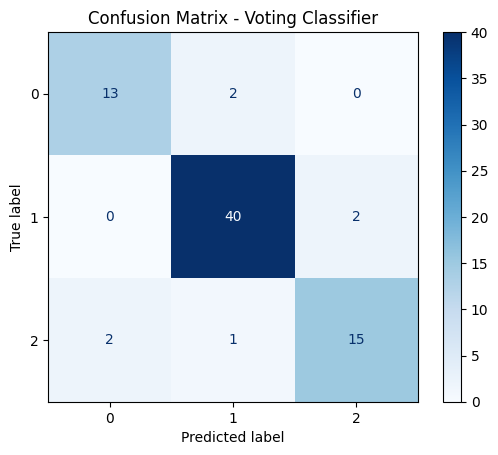

Chi-square test: chi2_stat = 105.01886956332922, p-value = 8.392137483263307e-22, degrees of freedom = 4


In [ ]:
import random
from deap import base, creator, tools
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import chi2, SelectKBest
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Apply the Chi-Square test
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)

# Create a DataFrame to view the p-values for each feature
chi2_results = pd.DataFrame(data={'Feature': X.columns, 'Chi2 Stat': chi2_selector.scores_, 'p-value': chi2_selector.pvalues_})

# Set a significance level (alpha)
alpha = 0.05

# Filter out features with p-values above alpha
significant_features = chi2_results[chi2_results['p-value'] <= alpha]['Feature']
X = X[significant_features]

print(f"Significant features selected by Chi-Square test: {significant_features.tolist()}")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the fitness function for GA
def evaluate(individual):
    # Unpack the individual
    knn_n_neighbors, svc_C, svc_gamma = individual

    # Ensure valid values
    knn_n_neighbors = int(np.clip(knn_n_neighbors, 3, 20))
    svc_C = np.clip(svc_C, 0.1, 10.0)
    svc_gamma = np.clip(svc_gamma, 0.01, 1.0)

    # Define base learners with GA-chosen hyperparameters
    base_learners = [
        ('knn', KNeighborsClassifier(n_neighbors=knn_n_neighbors)),
        ('svc', SVC(C=svc_C, gamma=svc_gamma, probability=True, random_state=2)),
        ('nb', GaussianNB()),
    ]

    # Create the voting classifier
    voting_model = VotingClassifier(estimators=base_learners, voting='soft')

    # Cross-validation
    cv_scores = cross_val_score(voting_model, X_train, y_train, cv=5, scoring='accuracy')

    return np.mean(cv_scores),

# GA Setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int_knn_n_neighbors", random.randint, 3, 20)  # KNeighborsClassifier n_neighbors
toolbox.register("attr_float_svc_C", random.uniform, 0.1, 10.0)  # SVC C
toolbox.register("attr_float_svc_gamma", random.uniform, 0.01, 1.0)  # SVC gamma

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_int_knn_n_neighbors, toolbox.attr_float_svc_C, toolbox.attr_float_svc_gamma), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)

# Custom mutation function to ensure valid values
def mutate(individual):
    if random.random() < 0.2:  # Apply mutation with a probability of 0.2
        # Mutate the integer part (knn_n_neighbors)
        individual[0] = int(np.clip(individual[0] + random.gauss(0, 2), 3, 20))  # Ensure knn_n_neighbors stays within range
        # Mutate the float parts (svc_C and svc_gamma)
        individual[1] = np.clip(individual[1] + random.gauss(0, 1), 0.1, 10.0)  # Ensure svc_C stays within range
        individual[2] = np.clip(individual[2] + random.gauss(0, 0.1), 0.01, 1.0)  # Ensure svc_gamma stays within range
    return individual,

toolbox.register("mutate", mutate)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run GA
population = toolbox.population(n=10)

for ind in population:
    ind[1] = max(ind[1], 0.1)
    ind[2] = max(ind[2], 0.01)

ngen, cxpb, mutpb = 10, 0.5, 0.2

for gen in range(ngen):
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < cxpb:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < mutpb:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    population[:] = offspring

best_individual = tools.selBest(population, 1)[0]
print(f"Best Individual: {best_individual}")

# Train and evaluate the optimized VotingClassifier
best_knn_n_neighbors, best_svc_C, best_svc_gamma = best_individual

base_learners = [
    ('knn', KNeighborsClassifier(n_neighbors=int(best_knn_n_neighbors))),
    ('lr', LogisticRegression(random_state=2)),
    ('nb', GaussianNB()),
]

voting_model = VotingClassifier(estimators=base_learners, voting='soft')
voting_model.fit(X_train, y_train)

# Predict and evaluate the model on the training set
train_y_pred = voting_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)

# Predict and evaluate the model on the test set
vot_y_pred = voting_model.predict(X_test)
test_accuracy = accuracy_score(y_test, vot_y_pred)

# Print train, test, and CV accuracies
print("Voting Classifier")
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# Metrics
precision = precision_score(y_test, vot_y_pred, average='weighted')
recall = recall_score(y_test, vot_y_pred, average='weighted')
f1 = f1_score(y_test, vot_y_pred, average='weighted')
report = classification_report(y_test, vot_y_pred)

# Print the metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{report}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, vot_y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Perform Chi-Square test on confusion matrix
chi2_stat, chi2_p_value, dof, expected = chi2_contingency(cm)
print(f"Chi-Square test on Confusion Matrix:")
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {chi2_p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Show the plot
plt.title("Confusion Matrix - Voting Classifier")
plt.show()


chi2_stat, chi2_p_value, dof, expected = chi2_contingency(cm)
print(f"Chi-square test: chi2_stat = {chi2_stat}, p-value = {chi2_p_value}, degrees of freedom = {dof}")



In [ ]:
gb_accuracy = accuracy_score(y_test, gra_pred_test)
st_accuracy = accuracy_score(y_test, test_y_pred)
bg_accuracy = accuracy_score(y_test, bagg_y_pred)
vot_accuracy = accuracy_score(y_test, vot_y_pred)

accuracy_scores = [gb_accuracy,st_accuracy,bg_accuracy,vot_accuracy]
print(accuracy_scores)

import plotly.express as px

fig = px.bar(x=['Gradient Boosting', 'Stacking', 'Bagging', 'Voting Classifier'], y=accuracy_scores,
             labels={'x': 'Models', 'y': 'Accuracy Score'},
             title='Accuracy Scores of Different Models (after optimization)')

# Annotate the bars with the accuracy scores
fig.update_traces(text=[f'{acc:.4f}' for acc in accuracy_scores], textposition='outside')

# Show the plot
fig.show()

[0.9466666666666667, 0.9333333333333333, 0.92, 0.9066666666666666]


# New section

[ Gradient Boosting Report - Training Set ]

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        62
           1       0.95      0.95      0.95       177
           2       0.90      0.88      0.89        60

    accuracy                           0.93       299
   macro avg       0.91      0.91      0.91       299
weighted avg       0.93      0.93      0.93       299

Precision: 0.9265
Recall: 0.9264
F1 Score: 0.9264
[ Gradient Boosting Report - Cross-Validation ]

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        62
           1       0.94      0.95      0.95       177
           2       0.82      0.88      0.85        60

    accuracy                           0.90       299
   macro avg       0.88      0.87      0.87       299
weighted avg       0.90      0.90      0.90       299

Precision: 0.9038
Recall: 0.9030
F1 Score: 0.9027
[ Gradient Boosting Report - Test Set ]

   

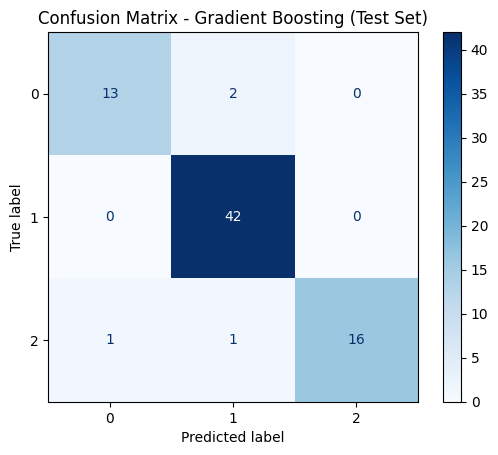

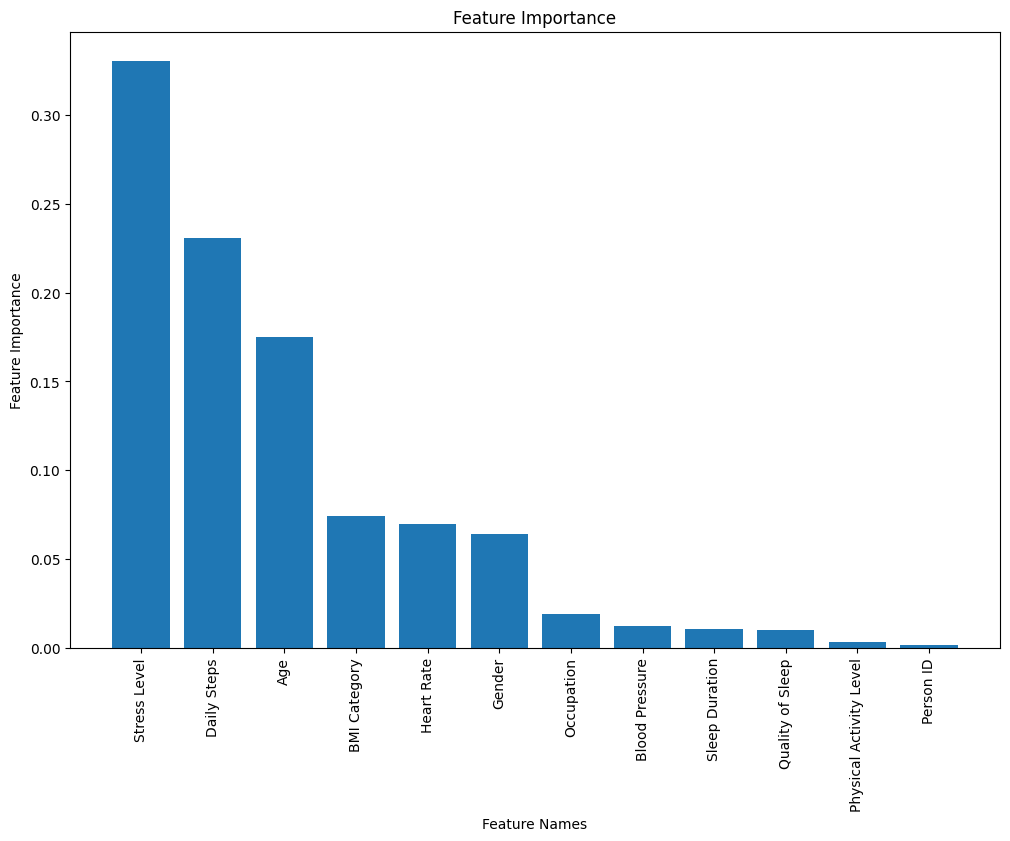

Train Accuracy: 0.9264214046822743
Test Accuracy: 0.9466666666666667
Cross-Validation Accuracy: 0.903010033444816
[ Voting Classifier Report - Test Set Metrics ]
Precision: 0.9484
Recall: 0.9467
F1 Score: 0.9459
Accuracy: 0.9467


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Gradient Boosting model with adjusted hyperparameters
gb_d = GradientBoostingClassifier(
    n_estimators=200,          # Number of trees
    max_depth=4,               # Depth of each tree
    learning_rate=0.01,        # Learning rate
    min_samples_split=5,       # Minimum samples required to split an internal node
    min_samples_leaf=2,        # Minimum number of samples required at a leaf node
    random_state=2
)

# Perform cross-validation to evaluate the model
cv_y_pred = cross_val_predict(gb_d, X_train, y_train, cv=5)
cv_accuracy = accuracy_score(y_train, cv_y_pred)

# Train the model on the full training set
gb_d.fit(X_train, y_train)

# Predict on the training set
train_y_pred = gb_d.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)

# Predict on the test set
test_y_pred = gb_d.predict(X_test)
test_accuracy = accuracy_score(y_test, test_y_pred)

# Generate and print the classification reports
print("[ Gradient Boosting Report - Training Set ]\n")
print(classification_report(y_train, train_y_pred))

precision_grat = precision_score(y_train, train_y_pred, average='weighted')
recall_grat = recall_score(y_train, train_y_pred, average='weighted')
f1_grat = f1_score(y_train, train_y_pred, average='weighted')
print(f'Precision: {precision_grat:.4f}')
print(f'Recall: {recall_grat:.4f}')
print(f'F1 Score: {f1_grat:.4f}')

print("[ Gradient Boosting Report - Cross-Validation ]\n")
print(classification_report(y_train, cv_y_pred))

precision_gratc = precision_score(y_train, cv_y_pred, average='weighted')
recall_gratc = recall_score(y_train, cv_y_pred, average='weighted')
f1_gratc = f1_score(y_train, cv_y_pred, average='weighted')
print(f'Precision: {precision_gratc:.4f}')
print(f'Recall: {recall_gratc:.4f}')
print(f'F1 Score: {f1_gratc:.4f}')

print("[ Gradient Boosting Report - Test Set ]\n")
print(classification_report(y_test, test_y_pred))

# Generate and print the confusion matrices
print("[ Confusion Matrix - Training Set ]")
print(confusion_matrix(y_train, train_y_pred))

print("[ Confusion Matrix - Cross-Validation ]")
print(confusion_matrix(y_train, cv_y_pred))

print("[ Confusion Matrix - Test Set ]")
print(confusion_matrix(y_test, test_y_pred))

# Plot the confusion matrix for the test set
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gradient Boosting (Test Set)")
plt.show()

# Plot feature importances
feature_names = [
    'Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
    'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
    'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps'
]

# Get feature importances from the Gradient Boosting model
feature_importances = gb_d.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

# Print accuracy results
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Cross-Validation Accuracy: {cv_accuracy}')

precision_gra = precision_score(y_test, test_y_pred, average='weighted')
recall_gra = recall_score(y_test, test_y_pred, average='weighted')
f1_gra = f1_score(y_test, test_y_pred, average='weighted')
test_accuracy_gra = accuracy_score(y_test, test_y_pred)

# Print the metrics
print("[ Voting Classifier Report - Test Set Metrics ]")
print(f'Precision: {precision_gra:.4f}')
print(f'Recall: {recall_gra:.4f}')
print(f'F1 Score: {f1_gra:.4f}')
print(f'Accuracy: {test_accuracy_gra:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

[ Bagging Classifier Report - Training Set ]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        62
           1       0.95      0.95      0.95       177
           2       0.90      0.88      0.89        60

    accuracy                           0.93       299
   macro avg       0.92      0.91      0.92       299
weighted avg       0.93      0.93      0.93       299

[ Bagging Classifier Report - Cross-Validation ]

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        62
           1       0.95      0.91      0.93       177
           2       0.79      0.88      0.83        60

    accuracy                           0.89       299
   macro avg       0.85      0.87      0.86       299
weighted avg       0.89      0.89      0.89       299

[ Bagging Classifier Report - Test Set ]

              precision    recall  f1-score   support

           0       0.93      0.87      0.90  

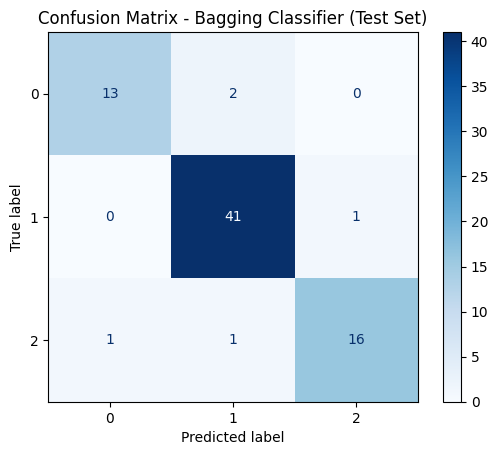

Train Accuracy: 0.9297658862876255
Test Accuracy: 0.9333333333333333
Cross-Validation Accuracy: 0.8862876254180602
[ Voting Classifier Report - Test Set Metrics ]
Precision: 0.9334
Recall: 0.9333
F1 Score: 0.9327
Accuracy: 0.9333


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the base learner for bagging
base_learner = DecisionTreeClassifier(random_state=2)

# Create the bagging classifier
bagging_model = BaggingClassifier(base_estimator=base_learner, n_estimators=50, random_state=2)

# Perform cross-validation and predict
cv_y_pred = cross_val_predict(bagging_model, X_train, y_train, cv=5)
cv_accuracy = accuracy_score(y_train, cv_y_pred)

# Train the bagging classifier on the full training set
bagging_model.fit(X_train, y_train)

# Predict and evaluate the model on the training set
train_y_pred = bagging_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)

# Predict and evaluate the model on the test set
bag_y_pred = bagging_model.predict(X_test)
test_accuracy = accuracy_score(y_test, bag_y_pred)

# Generate and print the classification reports
print("[ Bagging Classifier Report - Training Set ]\n")
print(classification_report(y_train, train_y_pred))

print("[ Bagging Classifier Report - Cross-Validation ]\n")
print(classification_report(y_train, cv_y_pred))

print("[ Bagging Classifier Report - Test Set ]\n")
print(classification_report(y_test, bag_y_pred))

# Generate and print the confusion matrices
print("[ Confusion Matrix - Training Set ]")
print(confusion_matrix(y_train, train_y_pred))

print("[ Confusion Matrix - Cross-Validation ]")
print(confusion_matrix(y_train, cv_y_pred))

print("[ Confusion Matrix - Test Set ]")
print(confusion_matrix(y_test, bag_y_pred))

# Display the confusion matrix for the test set
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, bag_y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Bagging Classifier (Test Set)")
plt.show()

# Print accuracy results
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Cross-Validation Accuracy: {cv_accuracy}')

precision_bag = precision_score(y_test, bag_y_pred, average='weighted')
recall_bag = recall_score(y_test, bag_y_pred, average='weighted')
f1_bag = f1_score(y_test, bag_y_pred, average='weighted')
test_accuracy_bag = accuracy_score(y_test, bag_y_pred)

# Print the metrics
print("[ Voting Classifier Report - Test Set Metrics ]")
print(f'Precision: {precision_bag:.4f}')
print(f'Recall: {recall_bag:.4f}')
print(f'F1 Score: {f1_bag:.4f}')
print(f'Accuracy: {test_accuracy_bag:.4f}')


[ Voting Classifier Report - Training Set ]

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        62
           1       0.95      0.91      0.93       177
           2       0.86      0.85      0.86        60

    accuracy                           0.89       299
   macro avg       0.86      0.88      0.87       299
weighted avg       0.89      0.89      0.89       299

[ Voting Classifier Report - Cross-Validation ]

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        62
           1       0.95      0.91      0.93       177
           2       0.88      0.83      0.85        60

    accuracy                           0.89       299
   macro avg       0.86      0.88      0.87       299
weighted avg       0.90      0.89      0.89       299

[ Voting Classifier Report - Test Set ]

              precision    recall  f1-score   support

           0       0.76      0.87      0.81     

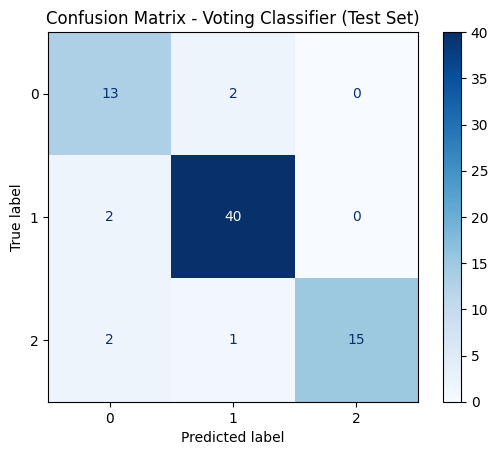

Train Accuracy: 0.8896321070234113
Test Accuracy: 0.9066666666666666
Cross-Validation Accuracy: 0.8896321070234113
[ Voting Classifier Report - Test Set Metrics ]
Precision: 0.9139
Recall: 0.9067
F1 Score: 0.9077
Accuracy: 0.9067


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
best_knn_n_neighbors = 5

# Define different base learners
base_learners = [
   ('knn', KNeighborsClassifier(n_neighbors=int(best_knn_n_neighbors))),
    ('lr', LogisticRegression(random_state=2)),
    ('nb', GaussianNB()),
]

# Create the voting classifier
voting_model = VotingClassifier(estimators=base_learners, voting='soft')

# Perform cross-validation and predict
cv_y_pred = cross_val_predict(voting_model, X_train, y_train, cv=5)
cv_accuracy = accuracy_score(y_train, cv_y_pred)

# Train the voting classifier on the full training set
voting_model.fit(X_train, y_train)

# Predict and evaluate the model on the training set
train_y_pred = voting_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)

# Predict and evaluate the model on the test set
vot_y_pred = voting_model.predict(X_test)
test_accuracy = accuracy_score(y_test, vot_y_pred)

# Print the classification reports
print("[ Voting Classifier Report - Training Set ]\n")
print(classification_report(y_train, train_y_pred))

print("[ Voting Classifier Report - Cross-Validation ]\n")
print(classification_report(y_train, cv_y_pred))

print("[ Voting Classifier Report - Test Set ]\n")
print(classification_report(y_test, vot_y_pred))

# Print the confusion matrices
print("[ Confusion Matrix - Training Set ]")
print(confusion_matrix(y_train, train_y_pred))

print("[ Confusion Matrix - Cross-Validation ]")
print(confusion_matrix(y_train, cv_y_pred))

print("[ Confusion Matrix - Test Set ]")
print(confusion_matrix(y_test, vot_y_pred))

# Display the confusion matrix for the test set
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, vot_y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Voting Classifier (Test Set)")
plt.show()

# Print accuracy results
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Cross-Validation Accuracy: {cv_accuracy}')

precision_vot = precision_score(y_test, vot_y_pred, average='weighted')
recall_vot = recall_score(y_test, vot_y_pred, average='weighted')
f1_vot = f1_score(y_test, vot_y_pred, average='weighted')
test_accuracy_vot = accuracy_score(y_test, vot_y_pred)

# Print the metrics
print("[ Voting Classifier Report - Test Set Metrics ]")
print(f'Precision: {precision_vot:.4f}')
print(f'Recall: {recall_vot:.4f}')
print(f'F1 Score: {f1_vot:.4f}')
print(f'Accuracy: {test_accuracy_vot:.4f}')


Stacking Classifier Evaluation on Test Set:
Train Accuracy: 0.9264
Test Accuracy: 0.9333
Precision: 0.9360
Recall: 0.9333
F1 Score: 0.9322
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.93      1.00      0.97        42
           2       1.00      0.83      0.91        18

    accuracy                           0.93        75
   macro avg       0.93      0.90      0.91        75
weighted avg       0.94      0.93      0.93        75

Stacking Classifier Evaluation on Cross-Validation Set:
Classification Report on CV Set:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        62
           1       0.94      0.94      0.94       177
           2       0.88      0.87      0.87        60

    accuracy                           0.91       299
   macro avg       0.90      0.89      0.90       299
weighted avg       0.91      0

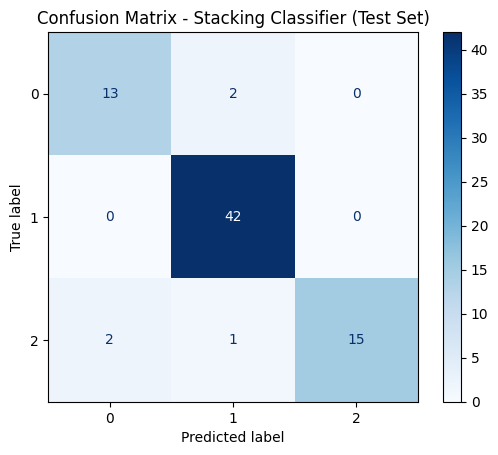

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the base learners
base_learners = [
    # ('lr', LogisticRegression(random_state=2)),
    ('rf', RandomForestClassifier(random_state=2)),
    ('gb', GradientBoostingClassifier(random_state=2)),
    ('adb', AdaBoostClassifier(random_state=2)),
    ('xgb', XGBClassifier(random_state=2)),
]

# Define the meta-learner
meta_learner = LogisticRegression(random_state=2)

# Create the stacking ensemble
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Perform cross-validation with multiple metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
cv_results = cross_validate(stacking_model, X_train, y_train, cv=cv,
                            scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
                            return_train_score=True)

# Output the cross-validation results
mean_cv_accuracy = cv_results['test_accuracy'].mean()
mean_cv_precision = cv_results['test_precision_weighted'].mean()
mean_cv_recall = cv_results['test_recall_weighted'].mean()
mean_cv_f1 = cv_results['test_f1_weighted'].mean()



# Train the stacking ensemble
stacking_model.fit(X_train, y_train)

# Predict and evaluate the model on the training set
train_y_pred = stacking_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)

# Predict and evaluate the model on the test set
test_y_pred = stacking_model.predict(X_test)
test_accuracy_st = accuracy_score(y_test, test_y_pred)

# Metrics for the test set
precision_st = precision_score(y_test, test_y_pred, average='weighted')
recall_st = recall_score(y_test, test_y_pred, average='weighted')
f1_st = f1_score(y_test, test_y_pred, average='weighted')
report_test = classification_report(y_test, test_y_pred)

print('Stacking Classifier Evaluation on Test Set:')
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy_st:.4f}')
print(f'Precision: {precision_st:.4f}')
print(f'Recall: {recall_st:.4f}')
print(f'F1 Score: {f1_st:.4f}')
print(f'Classification Report on Test Set:\n{report_test}')

# Generate classification report for cross-validation predictions
cv_y_pred = cross_val_predict(stacking_model, X_train, y_train, cv=cv)
report_cv = classification_report(y_train, cv_y_pred)

print('Stacking Classifier Evaluation on Cross-Validation Set:')
print(f'Classification Report on CV Set:\n{report_cv}')

print('Cross-validation results:')
print(f'Mean CV Accuracy: {mean_cv_accuracy:.4f}')
print(f'Mean CV Precision: {mean_cv_precision:.4f}')
print(f'Mean CV Recall: {mean_cv_recall:.4f}')
print(f'Mean CV F1 Score: {mean_cv_f1:.4f}')

# Generate classification report for the training set
report_train = classification_report(y_train, train_y_pred)

print('Stacking Classifier Evaluation on Training Set:')
print(f'Classification Report on Training Set:\n{report_train}')

precision_stt = precision_score(y_train, train_y_pred, average='weighted')
recall_stt = recall_score(y_train, train_y_pred, average='weighted')
f1_stt = f1_score(y_train, train_y_pred, average='weighted')

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Precision: {precision_stt:.4f}')
print(f'Recall: {recall_stt:.4f}')
print(f'F1 Score: {f1_stt:.4f}')


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix for the test set
cm_test = confusion_matrix(y_test, test_y_pred)

# Display the confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Stacking Classifier (Test Set)")
plt.show()


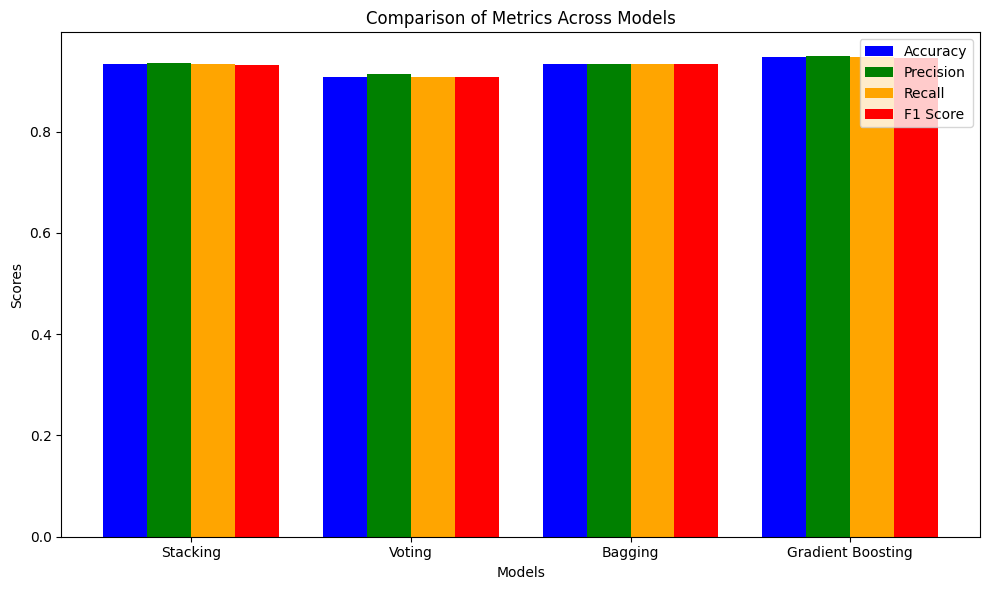

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for each model
models = ['Stacking', 'Voting', 'Bagging', 'Gradient Boosting']
accuracy = [test_accuracy_st, test_accuracy_vot, test_accuracy_bag, test_accuracy_gra]
precision = [precision_st, precision_vot, precision_bag, precision_gra]
recall = [recall_st, recall_vot, recall_bag, recall_gra]
f1 = [f1_st, f1_vot, f1_bag, f1_gra]

# Set up the bar chart
bar_width = 0.2
index = np.arange(len(models))

# Plot the bars for each metric
plt.figure(figsize=(10, 6))
plt.bar(index, accuracy, bar_width, label='Accuracy', color='blue')
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='green')
plt.bar(index + 2*bar_width, recall, bar_width, label='Recall', color='orange')
plt.bar(index + 3*bar_width, f1, bar_width, label='F1 Score', color='red')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Metrics Across Models')
plt.xticks(index + 1.5*bar_width, models)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


In [ ]:

import plotly.express as px

# Accuracy scores for the models
accuracy_scores = [test_accuracy_gra, test_accuracy_st, test_accuracy_bag, test_accuracy_vot]

# Create a bar plot
fig = px.bar(x=['Gradient Boosting', 'Stacking', 'Bagging', 'Voting Classifier'], y=accuracy_scores,
             labels={'x': 'Models', 'y': 'Accuracy Score'},
             title='Accuracy Scores of Different Models')

# Annotate the bars with the accuracy scores
fig.update_traces(text=[f'{acc:.4f}' for acc in accuracy_scores], textposition='outside')

# Show the plot
fig.show()
